# **Desafio ONG**

Somos uma ONG de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas. Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

- As pessoas desse experimento só verão 1 vídeo cada
- Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal
- As amostras são aleatórias e sem viéses sistematicos

***Objetivo: Avaliar qual animal (cachorro ou gato) deve estar em um vídeo de campanha de adoção***

Experimento: 500 pessoas que não possuem animais de estimação assistem aos vídeos de campanha de adoção. Os vídeos são idênticos com exceção dos animais mostrados:

- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro

***Resposta: "Qual a chance de adotar um pet? (0-100)" depois do vídeo***

***A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?***


In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### **Análise descritiva do dataframe**

In [48]:
df_ong = pd.read_csv("./cachorro_gato.csv")
df_ong.head()

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375


In [49]:
df_ong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   grupo       500 non-null    int64  
 2   escore      500 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


In [56]:
df_ong.groupby('grupo').describe()

Unnamed: 0                                                            
           count        mean         std  min    25%    50%    75%    max   
grupo                                                                       
0          253.0  247.470356  147.772334  1.0  117.0  256.0  366.0  499.0  \
1          247.0  251.578947  141.301675  0.0  131.5  240.0  377.5  497.0   

      escore                                                          
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372  \
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

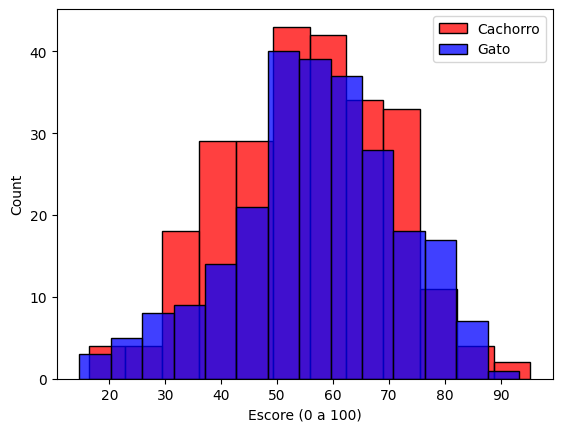

In [62]:

# histograma grupo que viu o video de Cachorro
sns.histplot(df_ong[df_ong['grupo'] == 0]['escore'], label = 'Cachorro', color = "red")

# histograma grupo que viu o video de Gato
sns.histplot(df_ong[df_ong['grupo'] == 1]['escore'], label = 'Gato', color="blue")
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

#### ***Resposta: "Qual a chance de adotar um pet? (0-100)" depois do vídeo***

Para calcular a média do percentual de chances de uma pessoa adotar um pet, basta somar todos os valores dos escores, que variam de 0 a 100, e dividir pelo número total de participantes do estudo.

In [50]:
media_adocao = df_ong.escore.sum()/df_ong.escore.count()
print(f"\n\033[1m Chances de adotar um pet pós vídeo é de {media_adocao:.2f}%\033[0m\n")


 Chances de adotar um pet pós vídeo é de 56.13%





## **Teste t-student independentes para duas amostras**

#### ***A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?***

Passos para realizar o teste de Hipótese:

- ***1. Definir as Hipóteses***
  - **Hipótese Nula [H0]:** Não há diferença entre as médias de probabilidade de adoção de gatos e cachorros.
  - **Hipótese Alternativa [Ha]:** Há uma diferença de probabilidade de adoção de gatos e cachorros

- ***2. Definir o nivel de significanca***
  - Como não foi dado, vamos adotar o nível de significância de 5%, ou 0.05.

- ***3. Definir qual teste usar:***

O teste adequado para este experimento é o teste t com 2 amostras, pois:

- 
  - Estamos querendo comparar a média de probabilidade entre duas amostras independentes
  - O desvio-padrão populacional é desconhecido, logo vamos usar o teste t para desvio-padrão desconhecido.

- ***4. Calcular a estatistica de teste***

$$t = \dfrac{(\bar{\text{x}}_1 - \bar{\text{x}}_2)-(\mu_1 - \mu_2)}{\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}}$$

- ***5. Encontrar o valor crítico ou p-valor***
  Para concontrar o p-valor vamos usar o Python que já possui uma biblioteca que nos permite obter esse valor passando as amostras como parâmetro da função.



#### Realizando o pré-processamento dos dados


In [51]:
df_ong.head()

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375


In [52]:
df_cachorros = (df_ong[df_ong["grupo"] == 0]).escore
df_cachorros

1      66.353529
3      67.995090
8      55.397542
10     58.049811
11     71.056544
         ...    
494    35.638201
495    70.292458
496    74.674293
498    58.625388
499    38.126324
Name: escore, Length: 253, dtype: float64

In [53]:
df_gatos = (df_ong[df_ong["grupo"] == 1]).escore
df_gatos

0      59.853433
2      56.495813
4      70.434375
5      22.516684
6      42.900630
         ...    
481    51.206188
485    63.329365
488    41.419790
489    63.994828
497    43.148814
Name: escore, Length: 247, dtype: float64

In [54]:
from scipy.stats import ttest_ind

t, p_valor = ttest_ind(a=df_cachorros, b=df_gatos, equal_var=False)

print(f"\nt-student: {t:.4f}")
print(f"p-valor: {p_valor:.4f}\n")


t-student: -0.9165
p-valor: 0.3599



- ***Tomada de decisão***

P-valor maior que alpha 0,05. Portanto, não rejeita-se a hipótese nula. Logo, não existe evidências suficiente, ao nível de significancia de 5%, para confirmar a afirmação de que as duas amostras com videos de cões e gatos tem aceitações diferentes.